# Artificial Neural Network (Digit Recognition)

<img src = 'ANN Architecture.drawio.png'>

## Importing the Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

## Defining All Functions

### Function to implement One Hot Encoding

In [8]:
def oneHotEncoding(Y):
    out = np.zeros((len(Y),10), dtype= 'uint8')
    for i in range(len(Y)):
        item = Y[i]
        out[i, item] = 1
    return out.T

In [9]:
# Testing the Function that Performs One Hot Encoding
pd.DataFrame(oneHotEncoding([0, 3, 4, 5, 1, 5, 3, 5, 1, 5, 1, 1, 4, 6, 7, 8, 9]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Function for ReLU as Activation Function

In [11]:
# ReLU(x) = {0 if x<0
            # x if x>=0}

def ReLU(input):
    input = np.array(input)
    shape = input.shape
    input = input.reshape(-1)
    input = np.array([max(0, x) for x in input])
    input = input.reshape(shape)
    return input

In [12]:
# Testing the working of the defined ReLU function
ReLU([[3, 5, 5], [3, -1, -10]])

array([[3, 5, 5],
       [3, 0, 0]])

### Implementing Derivative of ReLU Activation Function as a Function

In [14]:
# ReLU'(x) = {0 if x<0
            # 1 if x>=0}

def ReLUDerivative(input):
    input = np.array(input)
    shape = input.shape
    input = input.reshape(-1)
    input = np.array([1 if x>=0 else 0 for x in input])
    input = input.reshape(shape)
    return input

In [15]:
# Testing the working of the defined ReLU derivative function
ReLUDerivative([[3,5,5], [3, -1, -10]])

array([[1, 1, 1],
       [1, 0, 0]])

### Implementing SoftMax Function as a Function

In [17]:
import math
def softMax(input):
    vect_list = np.array(input).T
    for i in range(len(vect_list)):
        vector = np.array([math.exp(x) for x in vect_list[i]])
        denominator = sum(vector)
        vect_list[i] = vector/denominator
    return vect_list.T

In [18]:
# Testing the softMax Function:
softMax(np.array([
    [0.1, 0.004, 0.03, 0, 0.7, 0.006, 0.06, 0.1, 0.1, 0.1], 
    [0.1, 0.004, 0.03, 0.7, 0, 0.006, 0.06, 0.1, 0.1, 0.1],
    [0.7, 0.004, 0.03, 0.1, 0, 0.006, 0.06, 0.1, 0.1, 0.1],
       ]).T)

array([[0.09579566, 0.09579566, 0.17455107],
       [0.08702691, 0.08702691, 0.08702691],
       [0.08931928, 0.08931928, 0.08931928],
       [0.0866795 , 0.17455107, 0.09579566],
       [0.17455107, 0.0866795 , 0.0866795 ],
       [0.08720114, 0.08720114, 0.08720114],
       [0.09203946, 0.09203946, 0.09203946],
       [0.09579566, 0.09579566, 0.09579566],
       [0.09579566, 0.09579566, 0.09579566],
       [0.09579566, 0.09579566, 0.09579566]])

### Implementing this plotting process as a function

In [20]:
def plotImage(image):
    image = np.reshape(image, (28, 28))
    plt.imshow(image)

### Intializing Parameters from the Values taken from Logistic Distribution

In [22]:
def parametersInitializer():
    loc = 0  # mean at 0
    scale = 1 # steepness of the curve.
    size_w1 =  (10 , 784)
    size_w2 = (10, 10)
    size_b1 = 10
    size_b2 = 10 
    
    logistic_samples = np.random.logistic(loc, scale, size_w1[0] * size_w1[1])
    logistic_samples = logistic_samples/((abs(logistic_samples)).max()* 2) # scaling to make the values in the range of -0.5 to +0.5
    W1 = logistic_samples.reshape(size_w1)
    
    logistic_samples = np.random.logistic(loc, scale, size_w2[0] * size_w2[1])
    logistic_samples = logistic_samples/((abs(logistic_samples)).max()* 2) # scaling to make the values in the range of -0.5 to +0.5
    W2 = logistic_samples.reshape(size_w2)
    
    logistic_samples = np.random.logistic(loc, scale, size_b1)
    b1 = logistic_samples/((abs(logistic_samples)).max()* 2) # scaling to make the values in the range of -0.5 to +0.5
    
    logistic_samples = np.random.logistic(loc, scale, size_b2)
    b2 = logistic_samples/((abs(logistic_samples)).max()* 2) # scaling to make the values in the range of -0.5 to +0.5
    
    return (W1,b1,W2,b2)

In [23]:
# Testing parameters initializer function
W1, b1, W2, b2 = parametersInitializer()
print(W1)
print(b1)
print(W2)
print(b2)

[[ 0.14325259 -0.03405493  0.04639727 ... -0.13659361 -0.14855605
   0.12847078]
 [ 0.00709646  0.15928652 -0.09523444 ... -0.1315793   0.18508661
  -0.06633874]
 [ 0.14195652  0.11739972  0.03844081 ...  0.03561762 -0.23639674
   0.14630093]
 ...
 [-0.00956946 -0.11901468 -0.02297564 ...  0.06909417  0.07340906
  -0.16913603]
 [ 0.22535195 -0.05193549  0.01444403 ...  0.10738867  0.08446767
   0.10269391]
 [ 0.25992255 -0.00801079  0.03477584 ... -0.06319171  0.3221229
   0.19558291]]
[ 0.15352315 -0.5         0.12579088  0.03539286 -0.25069633  0.09171477
  0.37371239 -0.13412111 -0.10310175  0.23040519]
[[ 1.65924574e-01  3.52563203e-02  7.80521069e-02  5.97922285e-02
  -9.18545091e-02  3.10304839e-01 -2.10588489e-01  1.81005236e-01
  -2.97353527e-01 -1.66952681e-01]
 [-5.00000000e-01  9.93648307e-02  1.05006882e-01  4.69331968e-01
   2.03812616e-01 -1.89864951e-01  7.11972650e-02 -3.04131273e-02
   1.14669703e-01 -1.43869511e-01]
 [-2.24677962e-01 -1.20745916e-01  9.76887754e-02 -3

### Function to Update the Parameters

In [25]:
def updateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return (W1, b1, W2, b2)

### Function to Obtain Predictions

In [27]:
def obtainPrediction(out):
    out = out.T
    output = np.array([np.where(x == max(x))[0][0] for x in out])
    return output;

In [28]:
# Testing the obtainPrediction function: correct output should be 1
obtainPrediction(np.array([[0.1, 0.004, 0.03, 0, 0.7, 0.006, 0.06, 0.1, 0.1, 0.1], 
    [0.1, 0.004, 0.03, 0.7, 0, 0.006, 0.06, 0.1, 0.1, 0.1]]).T)

array([4, 3], dtype=int64)

### Function to Compute Accuracy

In [30]:
def computeAccuracy(A2, Y):
    Y = oneHotEncoding(Y)
    if(np.array(A2).shape != np.array(Y).shape):
        raise Exception('Given Two arrays must be of same shape')
    pred = obtainPrediction(A2)
    true = obtainPrediction(Y)
    correct_count = 0;
    for i in range(len(pred)):
        if(pred[i] == true[i]):
            correct_count += 1
    return correct_count/len(pred);

In [31]:
# Testing Exception Handling: should throw error
pred = np.array([
    [0.1, 0.004, 0.03, 0, 0.7, 0.006, 0.06, 0.1, 0.1, 0.1], 
    [0.1, 0.004, 0.03, 0.7, 0, 0.006, 0.06, 0.1, 0.1, 0.1],
       ])
true = [4, 8, 1]
try:
    computeAccuracy(pred, true)
except Exception as e:
    print(e)

Given Two arrays must be of same shape


In [32]:
# Testing the Function that computes the accuracy of the prediction: should return accuracy of 2/3
pred = np.array([
    [0.1, 0.004, 0.03, 0, 0.7, 0.006, 0.06, 0.1, 0.1, 0.1], 
    [0.1, 0.004, 0.03, 0.7, 0, 0.006, 0.06, 0.1, 0.1, 0.1],
    [0.7, 0.004, 0.03, 0.1, 0, 0.006, 0.06, 0.1, 0.1, 0.1],
       ]).T
true = np.array([4, 8, 0])
true = true.T 
computeAccuracy(pred, true)

0.6666666666666666

## Loading the Dataset

In [34]:
df = pd.read_csv('./../Datasets/digit_data.csv')

## Visualizing the First 5 Entries of the Dataset

In [36]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Converting the Dataframe into a Numpy Array

In [38]:
df_arr = np.array(df)

In [39]:
df_arr

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Storing the Shape of the Array

In [41]:
rows, columns = df_arr.shape

In [42]:
rows

42000

In [43]:
columns

785

## Shuffling the Rows of the Array

In [45]:
np.random.seed(101)
np.random.shuffle(df_arr)

In [46]:
df_arr

array([[1, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Creating a Test Set

### Using first 1000 instances of the dataset as the test set.

In [49]:
test_arr = df_arr[0:1000]

In [50]:
test_arr.shape

(1000, 785)

### Transposing Test Set

In [52]:
test_arr = test_arr.T

In [53]:
test_arr.shape

(785, 1000)

### Taking First Row as Test Labels

In [55]:
test_label = test_arr[0]

In [56]:
test_label.shape

(1000,)

### Taking Remaining Rows as Test Features

In [58]:
test_features = test_arr[1:]

In [59]:
test_features.shape

(784, 1000)

### Normalizing the Test Features

NOTE: Since the images have RGB values in the range of 0 to 255, dividing by 255 normalizes them to a value in the range of 0 to 1

In [62]:
test_features = test_features/255

In [63]:
test_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Creating a Training Set

### Using Remaining Instances of the Dataset as the Train Set

In [66]:
train_arr = df_arr[1000:]

In [67]:
train_arr.shape

(41000, 785)

### Transposing the Train Set

In [69]:
train_arr = train_arr.T

In [70]:
train_arr.shape

(785, 41000)

### Taking First Row as Train Labels

In [72]:
train_label = train_arr[0]

In [73]:
train_label.shape

(41000,)

### Taking Remaining Rows as Train Features

In [75]:
train_features = train_arr[1:]

In [76]:
train_features.shape

(784, 41000)

### Normalizing Train Features

In [78]:
train_features = train_features/255

In [79]:
train_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Generating a Random Index in the Range dedicated for Training Images

In [81]:
index = np.random.randint(0, train_features.shape[1])

## Plot the Images Corresponding to the Generated Index

In [83]:
image = train_features[:, index]

In [84]:
image.shape

(784,)

### Reshaping the image to its Normal 2D form

NOTE: Reshaping this image to 28 x 28 pixels as the 784 values in the images were the flattened array of image of height 28 px and width 28 px

In [87]:
image = np.reshape(image, (28, 28))

In [88]:
image.shape

(28, 28)

### Display the Image

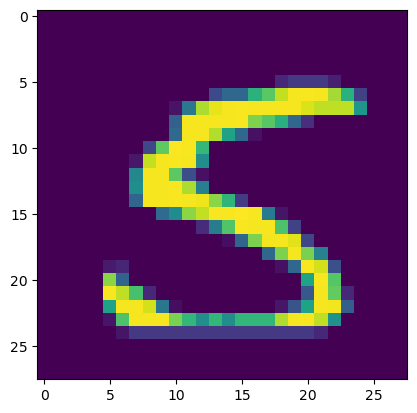

In [90]:
plt.imshow(image)

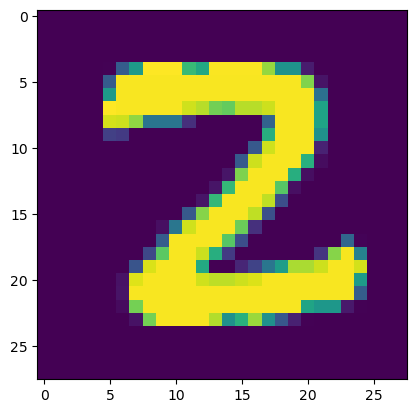

In [91]:
# Testing the plot image functionality
plotImage(train_features[:, 235])

## Function to Initialize Parameters


### Size of Different Parameters Matrix

<img src = './../Diagrams/params_size.png'>

### Visualizing Logistic Distribution

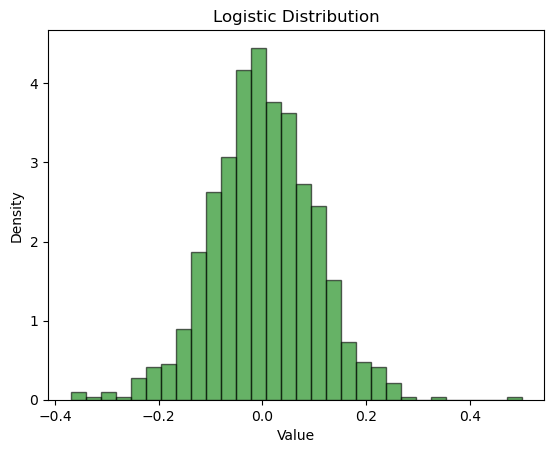

In [96]:
from scipy.stats import logistic

# Parameters for the logistic distribution
loc = 0  # mean at 0
scale = 1 # steepness of the curve.
size = 1000 # 1000 samples

# Generating Logistic Samples
logistic_samples = np.random.logistic(loc, scale, size)
logistic_samples = logistic_samples/((abs(logistic_samples)).max()* 2) # scaling to make the values in the range of -0.5 to +0.5

# visualization using histogram
plt.hist(logistic_samples, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

plt.title('Logistic Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


## Implmenting a Function that Performs a Forward Propagation

<img src = "./../Diagrams/Fwd_prop.png">

In [99]:
def forwardPropagation(W1, b1, W2, b2, A0):
    Z1 = np.matmul(W1, A0)
    Z1 = Z1 + np.repeat(b1, Z1.shape[1]).reshape(Z1.shape)
    A1 = ReLU(Z1)
    Z2 = np.matmul(W2, A1)
    Z2 = Z2 + np.repeat(b2, Z2.shape[1]).reshape(Z2.shape)
    A2 = softMax(Z2)
    return (Z1, A1, Z2, A2)

## Function to implement Backward Propagation

### Equations for Backward Propagation

<img src = './../Diagrams/bwd_prop.png'>

In [103]:
def backwardPropagation(Z1, A1, Z2, A2, W1, W2, A0, Y):
    Y = oneHotEncoding(Y)
    m = A0.shape[1]
    dZ2 = A2 - Y
    dW2 = (1/m) * np.matmul(dZ2, A1.T)
    sumDZ2 = [sum(x) for x in dZ2] # summing the elements in the row to get the matrix 
    db2 = (1/m) * np.array(sumDZ2)
    dZ1 = np.matmul(W2.T, dZ2) * ReLUDerivative(Z1)
    dW1 = (1/m) * np.matmul(dZ1, A0.T)
    sumDZ1 = [sum(x) for x in dZ1] # summing the elements in the row to get the matrix 
    db1 = (1/m) * np.array(sumDZ1)
    return (dW1, db1, dW2, db2)

## Function to Implement Gradient Descent

In [105]:
def gradientDescent(A0, Y, alpha, iter):
    (W1,b1,W2,b2) = parametersInitializer()
    dict = {}
    for iteration in range(1,iter+1):
        (Z1, A1, Z2, A2) = forwardPropagation(W1, b1, W2, b2, A0)
        (dW1, db1, dW2, db2) = backwardPropagation(Z1, A1, Z2, A2, W1, W2, A0, Y)
        (W1, b1, W2, b2) = updateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if(iteration%5 == 0):
            # (_, _, _, A2) = forwardPropagation(W1, b1, W2, b2, A0)
            # (_, _, _, T) = forwardPropagation(W1, b1, W2, b2, test_features)
            acc = computeAccuracy(A2, Y)
            print(iteration, acc)
            dict[iteration] = [W1, b1, W2, b2, acc]
    return dict

## Training the Model

In [107]:
accDict = gradientDescent(train_features, train_label, 0.1, 1000)

5 0.16297560975609757
10 0.263
15 0.2998292682926829
20 0.3373658536585366
25 0.39307317073170733
30 0.44695121951219513
35 0.4867073170731707
40 0.5204878048780488
45 0.5546585365853659
50 0.5901463414634146
55 0.6253170731707317
60 0.6566829268292683
65 0.683
70 0.7042682926829268
75 0.7221951219512195
80 0.7376341463414634
85 0.7525365853658537
90 0.7637073170731707
95 0.7742926829268293
100 0.7847560975609756
105 0.7929024390243903
110 0.7992439024390244
115 0.8061951219512196
120 0.8120243902439025
125 0.8180243902439024
130 0.8231463414634146
135 0.8283414634146341
140 0.8330487804878048
145 0.8368536585365853
150 0.8402195121951219
155 0.8437317073170731
160 0.8475365853658536
165 0.8510243902439024
170 0.8538780487804878
175 0.8570731707317073
180 0.8595365853658536
185 0.8621219512195122
190 0.8639024390243902
195 0.8662682926829268
200 0.8684146341463415
205 0.8696829268292683
210 0.8709268292682927
215 0.8726585365853659
220 0.8739268292682927
225 0.8754878048780488
230 0.87

In [108]:
accDict

{5: [array([[-0.08415309,  0.02505652,  0.07568672, ...,  0.0396473 ,
           0.07691424, -0.22458769],
         [ 0.04669989, -0.03130695, -0.00523461, ..., -0.13206759,
          -0.0151972 ,  0.00562117],
         [-0.03829203, -0.04701018,  0.12952596, ..., -0.02650673,
          -0.04891743,  0.01780821],
         ...,
         [ 0.04493768, -0.05681955, -0.09938609, ..., -0.07307323,
          -0.07329475, -0.01509706],
         [-0.14265759,  0.00355291,  0.04557793, ..., -0.0651766 ,
          -0.00664409, -0.0875039 ],
         [ 0.069517  ,  0.01395322, -0.04784353, ..., -0.10741568,
           0.11226065, -0.02668234]]),
  array([ 0.02237121,  0.22030608, -0.08061244, -0.07011389,  0.07291708,
         -0.48628914, -0.16763709,  0.18491505,  0.01336589,  0.23106831]),
  array([[-2.72518660e-01, -2.37433472e-02,  5.94800064e-02,
           3.02124444e-01, -1.21640119e-01,  1.20987090e-01,
           2.89361377e-01, -7.95626559e-03, -2.18849839e-03,
           4.38027299e-0

## Function for Making Predictions

In [174]:
def makePredictions(W1, b1, W2, b2, A0):
    A0 = np.array([A0]).T
    (_, _, _, A2) = forwardPropagation(W1, b1, W2, b2, A0)
    return obtainPrediction(A2)

## Function for Test Predictions

In [183]:
[W1, b1, W2, b2, _] = accDict[1000]
def testPredictions(index, W1, b1, W2, b2):
    test_image = test_features[:, index];
    pred = makePredictions(W1, b1, W2, b2, test_image)
    label = test_label[index]
    print('Pedicted Number: ', label)
    plotImage(test_image)

Pedicted Number:  4


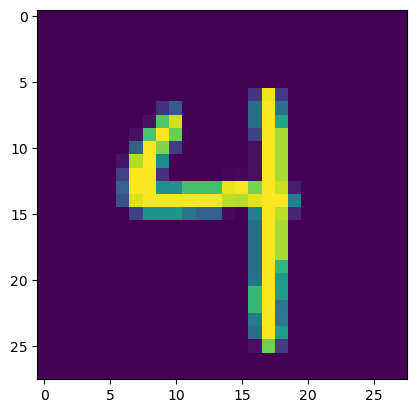

In [189]:
testPredictions(125, W1, b1, W2, b2)

In [119]:
accDict[1000]

[array([[-0.08415309,  0.02505652,  0.07568672, ...,  0.0396473 ,
          0.07691424, -0.22458769],
        [ 0.04669989, -0.03130695, -0.00523461, ..., -0.13206759,
         -0.0151972 ,  0.00562117],
        [-0.03829203, -0.04701018,  0.12952596, ..., -0.02650673,
         -0.04891743,  0.01780821],
        ...,
        [ 0.04493768, -0.05681955, -0.09938609, ..., -0.07307323,
         -0.07329475, -0.01509706],
        [-0.14265759,  0.00355291,  0.04557793, ..., -0.0651766 ,
         -0.00664409, -0.0875039 ],
        [ 0.069517  ,  0.01395322, -0.04784353, ..., -0.10741568,
          0.11226065, -0.02668234]]),
 array([-0.08171123,  0.36620247,  0.24688087,  0.23200959,  0.22443449,
        -0.45085674, -0.18635974,  0.05777922,  0.09188261,  0.13528001]),
 array([[-0.59407448, -0.46114342, -0.15918958,  0.97651248, -0.57586494,
          1.05880285,  0.21285931,  0.14651854, -0.27888752, -0.02713331],
        [ 0.23307979,  1.04512641, -0.80806258,  0.00791269, -0.21645118,
  

In [127]:
iter = []
train_acc = []
test_acc = []
for key, value in accDict.items():
    iter.append(key)
    (W1, b1, W2, b2, acc) = value
    train_acc.append(acc)
    (_, _, _, T) = forwardPropagation(W1, b1, W2, b2, test_features)
    test = computeAccuracy(T, test_label)
    test_acc.append(test)

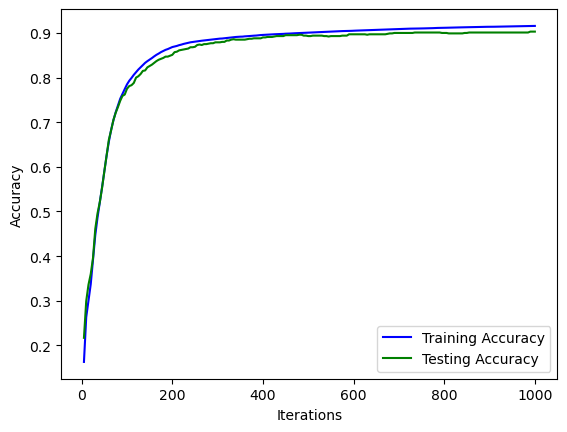

In [170]:
plt.figure()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(iter, train_acc, color = 'b', label = 'Training Accuracy')
plt.plot(iter, test_acc, color = 'g', label = 'Testing Accuracy')
plt.legend()